Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

#logistic regression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#sklearn 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
#metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn import metrics 

Download dataset

In [2]:
df=pd.read_csv('films2020_2021_2022_visu.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0.0,0.0,0.0,87,5,mai,2023,bad,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,1.0,0.0,0.0,94,12,août,2022,soso,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,3.6,Philippe Lioret,...,4.0,0.0,0.0,94,4,janvier,2023,good,1,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0.0,0.0,0.0,100,15,juillet,2022,soso,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,0.0,0.0,0.0,106,27,avril,2022,bad,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,White Building,Drame,NaN,Kavich Neang,Piseth Chhun,Sithan Hout,Sokha Uk,3.5,2.8,Kavich Neang,...,0.0,0.0,0.0,90,22,décembre,2021,soso,4,0
3280,Who's the Boss,Comédie,Romance,Chinaza Onuzo,Funke Akindele,Blossom Chukwujekwu,Sharon Ooja,NaN,2.9,NaN,...,0.0,0.0,0.0,105,25,octobre,2022,soso,0,0
3281,Why Moths Fly to the Light?,Drame,NaN,Zaur Dzhafarov,Anita Shmatova,Arthur Valente,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,62,15,mars,2021,soso,0,0
3282,Wildland,Policier,Thriller,Jeanette Nordahl,Sandra Guldberg Kampp,Sidse Babett Knudsen,Joachim Fjelstrup,NaN,1.9,Ingeborg Topsøe,...,0.0,0.0,1.0,88,9,novembre,2021,bad,0,0


In [3]:
df.isnull().sum()

Titre                        0
genre1                       0
genre2                    1217
réalisateur_1                0
actor_1                      0
actor_2                      0
actor_3                     67
note_presse               2073
note_spectators              0
Scenar                     287
nationality_1                3
distributor               1620
language                     0
real_awards                  0
first_actor_awards           0
second_actor_awards          0
length_corrected             0
day                          0
month                        0
year                         0
note_spectator_word          0
nomi                         0
note_spectators_binary       0
dtype: int64

In [4]:
df=df.drop(["note_spectator_word","note_spectators"], axis=1) #drop redundant

In [5]:
y=df['note_spectators_binary'] #default y
X=df.drop(columns='note_spectators_binary') #other variables than the target one

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#it will be set to 0.25.for the test size and 75% for train if no value specified

In [7]:
y_train

407     1
2512    0
1941    0
2555    1
2218    0
       ..
1095    1
1130    0
1294    1
860     0
3174    0
Name: note_spectators_binary, Length: 2463, dtype: int64

In [8]:
y_test

2208    0
1084    0
1655    1
1651    1
1450    1
       ..
2184    1
3264    1
859     0
1228    0
2473    0
Name: note_spectators_binary, Length: 821, dtype: int64

In [9]:
print("--- Total ---")
print(y.value_counts(normalize=True))
#normalize = True => en %
print("--- Train ---")
print(y_train.value_counts(normalize=True))
print("--- Test ---")
print(y_test.value_counts(normalize=True))

--- Total ---
0    0.624543
1    0.375457
Name: note_spectators_binary, dtype: float64
--- Train ---
0    0.617946
1    0.382054
Name: note_spectators_binary, dtype: float64
--- Test ---
0    0.644336
1    0.355664
Name: note_spectators_binary, dtype: float64


In [10]:
df.columns

Index(['Titre', 'genre1', 'genre2', 'réalisateur_1', 'actor_1', 'actor_2',
       'actor_3', 'note_presse', 'Scenar', 'nationality_1', 'distributor',
       'language', 'real_awards', 'first_actor_awards', 'second_actor_awards',
       'length_corrected', 'day', 'month', 'year', 'nomi',
       'note_spectators_binary'],
      dtype='object')

In [11]:
#We have different types of variables
#I list variables in function of what they correspond to
film = ["Titre", "genre1",'genre2','note_presse', "nationality_1","language","length_corrected","day","month","nomi","year"]

In [12]:
#Related to actors
actors = [
    "actor_1",
    "actor_2",
    'actor_3',
    "first_actor_awards",
    "second_actor_awards",
]
#Related to director and writer
director = [
    "réalisateur_1",
    'real_awards',
    'distributor',
    'Scenar',
]

In [13]:
#With only the most correlated features with the target one
M1=["length_corrected","nomi","language","note_presse"]

In [14]:
#With all variables we found interesting
M2= ["actor_1","length_corrected","nationality_1","language","genre1","réalisateur_1","first_actor_awards", "nomi","note_presse","real_awards"]

In [15]:
X.head()

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,Scenar,nationality_1,distributor,language,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,nomi
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,NaN,Belgique,NaN,Anglais,0.0,0.0,0.0,87,5,mai,2023,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,Robert Horn,U.S.A.,NaN,Anglais,1.0,0.0,0.0,94,12,août,2022,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,Philippe Lioret,France,Paname Distribution,Français,4.0,0.0,0.0,94,4,janvier,2023,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,Julia Yorks,Canada,NaN,Anglais,0.0,0.0,0.0,100,15,juillet,2022,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,Tomasz Mandes,Pologne,NaN,Anglais,0.0,0.0,0.0,106,27,avril,2022,2


In [16]:
X_train_M1=X_train[M1]
X_test_M1 =X_test[M1]

X_train_M2=X_train[M2]
X_test_M2 =X_test[M2]

In [17]:
k = KFold(n_splits=4, shuffle=True, random_state=42)
#cross validation function: 

In [18]:
C_value_logit = [1e20]
#the fact that I don't want regularisation => C= 1/lambda => here really small lambda => regularisation =0
#C is a hyperparameter of the logistic function 

In [19]:
#2 dictionaries to keep the performancies
test_accuracy={}
test_auc_roc={}

### Model 1: Logit
#### Set up Logit model object

In [20]:
logistic = LogisticRegressionCV(
    Cs=C_value_logit,#I have no regularisation
    cv=k, #how I want to do cross-validation
    refit=True,
    solver='newton-cg' ,
    tol=1e-7,
    random_state=42,
)
#I precise lots of the hyperparameters

In [21]:
logi = LogisticRegression(
    solver='liblinear',
    random_state=42,
)

For M1

In [22]:
from sklearn.compose import make_column_selector as selector
#how I will handle the categorical and numerical vraiables
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train_M1)
categorical_columns

['language']

In [23]:
numeric_columns = [col for col in X_train_M1.columns if col not in categorical_columns]
numeric_columns

['length_corrected', 'nomi', 'note_presse']

In [24]:
categorical_transformer= Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]

)

In [25]:
numeric_transformer= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean', fill_value='missing')),
        ("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler())])

In [26]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),    
]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing')),
                                                 ('scaler', StandardScaler())]),
                                 ['length_corrected', 'nomi', 'note_presse']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['language'])])

In [27]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logi_M1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logi)]
)
pipeline_logi_M1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected', 'nomi',
                                                   'note_presse']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encod

In [28]:
pipeline_logi_M1.fit(X_train_M1, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected', 'nomi',
                                                   'note_presse']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encod

In [29]:
y_test_hat = pipeline_logi_M1.predict(X_test_M1)
y_test_hat_probs = pipeline_logi_M1.predict_proba(X_test_M1)[:,1]

test_accuracy['logi_m1'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logi_m1'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logi_m1'])
print('Testing accuracy: %.4f %%' % test_accuracy['logi_m1']) 

Confusion matrix:
 [[460  69]
 [176 116]]
Testing AUC: 70.7276 %
Testing accuracy: 70.1583 %


Optimal Specificity: 0.8695652173913043
Optimal Sensitivity: 0.3972602739726027


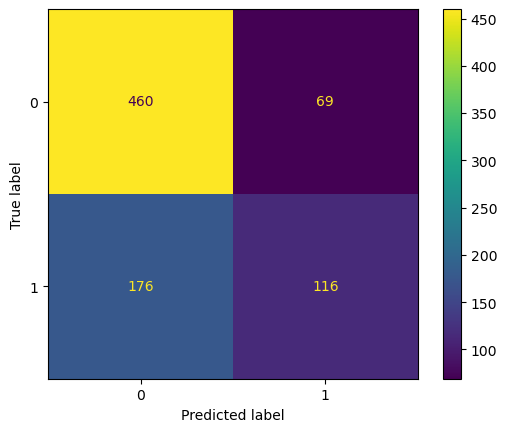

In [30]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_hat) #to have a more visual confusion matrix
true_neg, false_pos,false_neg, true_pos = conf_matrix.ravel()
fig = metrics.ConfusionMatrixDisplay(conf_matrix)
fig.plot() #  Creates the figure
plt.savefig('confulogiM1.pdf')
specificity = true_neg / (true_neg + false_pos)
print("Optimal Specificity:", specificity)
sensitivity =true_pos / (true_pos + false_neg)
print("Optimal Sensitivity:", sensitivity)

For M2

In [31]:
from sklearn.compose import make_column_selector as selector
#how I will handle the categorical and numerical vraiables
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train_M2)
categorical_columns

['actor_1', 'nationality_1', 'language', 'genre1', 'réalisateur_1']

In [32]:
categorical_transformer= Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]

)

In [33]:
numeric_columns = [col for col in X_train_M2.columns if col not in categorical_columns]
numeric_columns

['length_corrected',
 'first_actor_awards',
 'nomi',
 'note_presse',
 'real_awards']

In [34]:
numeric_transformer= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean', fill_value='missing')),
        ("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler())])

In [35]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),    
]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing')),
                                                 ('scaler', StandardScaler())]),
                                 ['length_corrected', 'first_actor_awards',
                                  'nomi', 'note_presse', 'real_awards']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['actor_1', 'nationality_1', 'language',
                                  'genre1', 'réalisateur_1'])])

##### The pipeline:

In [36]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logi_M2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logi)]
)
pipeline_logi_M2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [37]:
pipeline_logi_M2.fit(X_train_M2, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [38]:
y_test_hat = pipeline_logi_M2.predict(X_test_M2)
y_test_hat_probs = pipeline_logi_M2.predict_proba(X_test_M2)[:,1]

test_accuracy['logi_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logi_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logi_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['logi_m2']) 

Confusion matrix:
 [[451  78]
 [136 156]]
Testing AUC: 76.5841 %
Testing accuracy: 73.9342 %


Optimal Specificity: 0.8525519848771267
Optimal Sensitivity: 0.5342465753424658


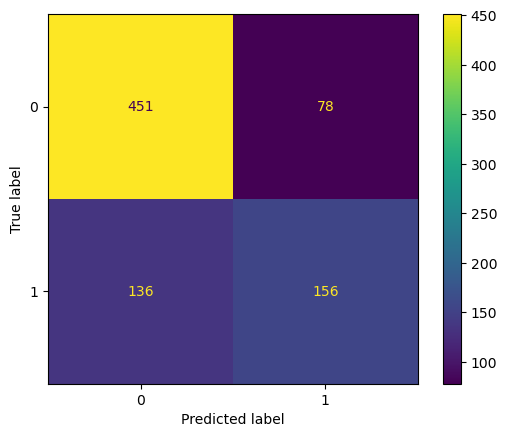

In [39]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_hat) #to have a more visual confusion matrix
true_neg, false_pos,false_neg, true_pos = conf_matrix.ravel()
fig = metrics.ConfusionMatrixDisplay(conf_matrix)
fig.plot() #  Creates the figure
plt.savefig('confulogiM2.pdf')
specificity = true_neg / (true_neg + false_pos)
print("Optimal Specificity:", specificity)
sensitivity =true_pos / (true_pos + false_neg)
print("Optimal Sensitivity:", sensitivity)

## With LogisticRegressionCV

In [40]:
k = KFold(n_splits=5, shuffle=True, random_state=42)
#cross validation function: 

In [41]:
C_value_logit = [1e20]
#the fact that I don't want regularisation => C= 1/lambda => here really small lambda => regularisation =0
#C is a hyperparameter of the logistic function

In [42]:
logistic = LogisticRegressionCV(
    Cs=C_value_logit,#I have no regularisation
    cv=k, #how I want to do cross-validation
    refit=True,
    solver='newton-cg' ,
    tol=1e-7,
    random_state=30,
)
#I precise lots of the hyperparameters

In [43]:
pipeline_logit_M2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic)]
)
pipeline_logit_M2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [44]:
pipeline_logit_M2.fit(X_train_M2, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [45]:
y_test_hat = pipeline_logit_M2.predict(X_test_M2)
y_test_hat_probs = pipeline_logit_M2.predict_proba(X_test_M2)[:,1]

test_accuracy['logit_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logit_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logit_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['logit_m2']) 

Confusion matrix:
 [[387 142]
 [127 165]]
Testing AUC: 68.8635 %
Testing accuracy: 67.2351 %


Optimal Specificity: 0.7315689981096408
Optimal Sensitivity: 0.565068493150685


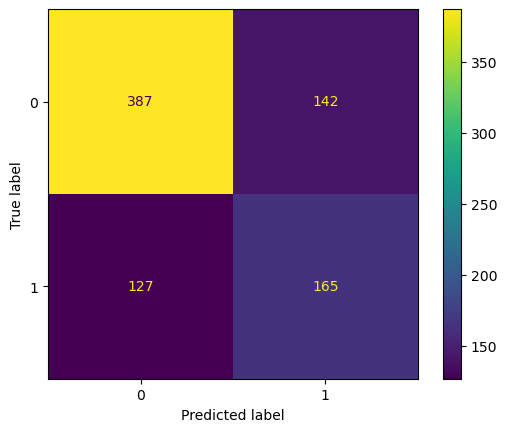

In [46]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_hat) #to have a more visual confusion matrix
true_neg, false_pos,false_neg, true_pos = conf_matrix.ravel()
fig = metrics.ConfusionMatrixDisplay(conf_matrix)
fig.plot() #  Creates the figure
plt.savefig('confulogitM2.pdf')
specificity = true_neg / (true_neg + false_pos)
print("Optimal Specificity:", specificity)
sensitivity =true_pos / (true_pos + false_neg)
print("Optimal Sensitivity:", sensitivity)

### Lasso

In [47]:
lambdas = list(10 ** np.arange(-1, -4.01, -1 / 3))
n_obs = X_train_M2.shape[0] * 4 / 5
C_values = [
    1 / (l * n_obs) for l in lambdas
]  # Cs are the inverse of regularization strength
len(C_values)

10

In [48]:
logistic_lasso = LogisticRegressionCV(
    Cs=C_values,
    penalty="l1", # L1 regularization = lasso 
    cv=k,
    refit=True,
    scoring="roc_auc",
    solver="liblinear",
    random_state=24,
)


In [49]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logistic_lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic_lasso)]
)
pipeline_logistic_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [50]:
logLasso=pipeline_logistic_lasso.fit(X_train_M2, y_train)
logLasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [51]:
y_test_hat = pipeline_logistic_lasso.predict(X_test_M2)
y_test_hat_probs = pipeline_logistic_lasso.predict_proba(X_test_M2)[:,1]

test_accuracy['lasso'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['lasso'] = roc_auc_score(y_test, y_test_hat_probs, multi_class='ovr')*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['lasso'])
print('Testing accuracy: %.4f %%' % test_accuracy['lasso']) 

Confusion matrix:
 [[446  83]
 [138 154]]
Testing AUC: 75.6548 %
Testing accuracy: 73.0816 %


Optimal Specificity: 0.8431001890359168
Optimal Sensitivity: 0.5273972602739726


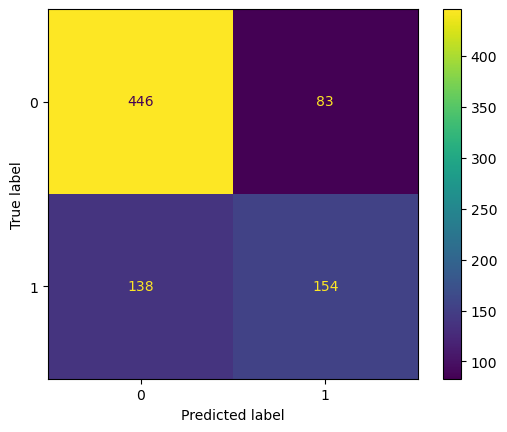

In [52]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_hat) #to have a more visual confusion matrix
true_neg, false_pos,false_neg, true_pos = conf_matrix.ravel()
fig = metrics.ConfusionMatrixDisplay(conf_matrix)
fig.plot() #  Creates the figure
plt.savefig('confulasso.pdf')
specificity = true_neg / (true_neg + false_pos)
print("Optimal Specificity:", specificity)
sensitivity =true_pos / (true_pos + false_neg)
print("Optimal Sensitivity:", sensitivity)

In [53]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_hat_probs)
roc_auc = metrics.auc(fpr, tpr)
threshold

array([1.99438633, 0.99438633, 0.96478206, 0.95262725, 0.94546047,
       0.94104162, 0.94028556, 0.93568154, 0.92820266, 0.92728574,
       0.87042357, 0.86479383, 0.86201307, 0.857157  , 0.82669602,
       0.82562233, 0.78520585, 0.78358525, 0.77409564, 0.7718817 ,
       0.75910965, 0.75261219, 0.74941893, 0.74694354, 0.74487637,
       0.7393095 , 0.73349748, 0.72789541, 0.72669794, 0.72657759,
       0.71251959, 0.70798901, 0.70796243, 0.70314026, 0.68825331,
       0.68745249, 0.68451173, 0.68416277, 0.68307751, 0.68269129,
       0.67150162, 0.67071282, 0.66850795, 0.66710689, 0.66628066,
       0.65418615, 0.64894993, 0.63979077, 0.63893705, 0.63254037,
       0.6288162 , 0.62418646, 0.61886763, 0.61659489, 0.61413957,
       0.61055382, 0.60926163, 0.60701595, 0.60281071, 0.60279526,
       0.60088636, 0.60062027, 0.59026747, 0.58781844, 0.58756563,
       0.58532336, 0.58505369, 0.58443942, 0.58241697, 0.57561834,
       0.57372537, 0.57309916, 0.56855135, 0.56708879, 0.56609

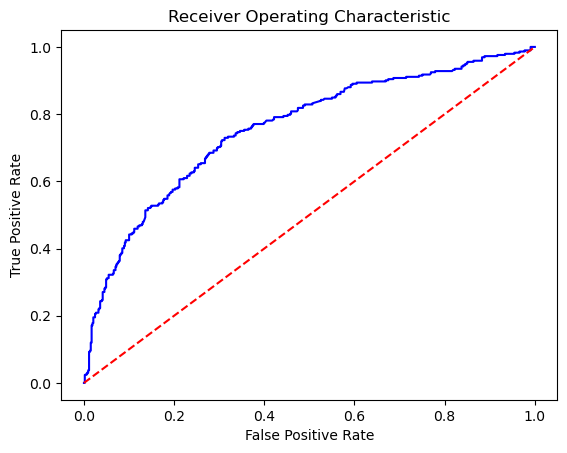

In [54]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBOOST

In [55]:
import xgboost as xgb

In [56]:
xgb_model = xgb.XGBClassifier(objective="reg:squarederror", random_state=42)

In [57]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_xgp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb_model)]
)
pipeline_xgp

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [58]:
model_xgb=pipeline_xgp.fit(X_train_M2, y_train)
model_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [59]:
y_test_hat = model_xgb.predict(X_test_M2)
y_test_hat_probs = model_xgb.predict_proba(X_test_M2)[:,1]

In [60]:
test_accuracy['xgb'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['xgb'] = roc_auc_score(y_test, y_test_hat_probs)*100
print('Testing AUC: %.4f %%' % test_auc_roc['xgb'])
print('Testing accuracy: %.4f %%' % test_accuracy['xgb']) 

Testing AUC: 77.9899 %
Testing accuracy: 73.5688 %


Optimal Specificity: 0.8449905482041588
Optimal Sensitivity: 0.5376712328767124


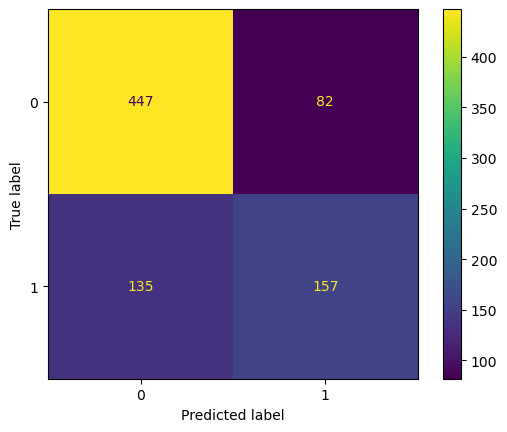

In [61]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_hat) #to have a more visual confusion matrix
true_neg, false_pos,false_neg, true_pos = conf_matrix.ravel()
fig = metrics.ConfusionMatrixDisplay(conf_matrix)
fig.plot() #  Creates the figure
plt.savefig('xgboost.pdf')
specificity = true_neg / (true_neg + false_pos)
print("Optimal Specificity:", specificity)
sensitivity =true_pos / (true_pos + false_neg)
print("Optimal Sensitivity:", sensitivity)

## Comparing the different models

In [62]:
test_auc_roc

{'logi_m1': 70.72759406479013,
 'logi_m2': 76.58414687831784,
 'logit_m2': 68.86345391925836,
 'lasso': 75.65482818447833,
 'xgb': 77.9899396638786}

In [63]:
test_accuracy

{'logi_m1': 70.15834348355664,
 'logi_m2': 73.93422655298416,
 'logit_m2': 67.23507917174177,
 'lasso': 73.0816077953715,
 'xgb': 73.5688185140073}

We can see that logi_m2 gives the best results so we have found a model allowing us to predict success of films